# Problem formulation
The problem at hand is a binary classification task between two tetris pieces, the "I" and the "O". These pieces were chosen since they neatly represent "1" and "0" graphically (which will be their embedding in this problem). To classify images with "I" or "O" in them, images in the form of 4x4x1 matrices are fed to a CNN+FCNN, the performance of which is determined with binary cross-entropy and trained using stochastic gradient descent.

# Given
1. The network architecture  

| **Layer**   | **Input dim** | **Output dim** | **Other**                                                  |
|-------------|---------------|----------------|------------------------------------------------------------|
| Input       | 4x4           | 4x4            | "I" or "O" in input                                        |
| 2D convolve | 4x4           | 3x3            | Kernel: 2x2 with stride 1 and no padding. Activation: ReLU |
| Max pool    | 3x3           | 2x2            | Kernel: 2x2 with stride 1 and no padding.                  |
| Flatten     | 2x2           | 4x1            |                                                            |
| FCNN        | 4x1           | 1              | Activation: Sigmoid                                        |

which has a total of 10 parameters, decomposed into 2 biases from the CNN and FCNN, 4 kernel weights in the CNN and 4 weights in the FCNN.

2. An input matrix *X* and a label *y*, where *y* = 0 when *X* contains "O" and *y* = 1 when *X* contains "I"

# Find
1. The intermediate values in the network
2. Post-activation for a forward pass
3. Loss for a forward pass
3. Gradient of the loss function w.r.t. the network parameters


# Imports and helper functions

In [443]:
import numpy as np

import matplotlib.pyplot as plt

from dataclasses import dataclass

from __future__ import annotations
from itertools import product


class Matrix2D():

    def __init__(self, array: np.ndarray):
        assert len(array.shape) == 2, "Input array must be 2D!"

        self.data: np.ndarray = array
        self.nrow: int = array.shape[0]
        self.ncol: int = array.shape[1] 

    def __getitem__(self, key):
        return self.data[key]

    def __setitem__(self, key, val):
        self.data[key] = val

    def __gt__(self, other):
        return self.data > other

    
    def __lt__(self, other):
        return self.data < other


    def draw(self, title: str = "") -> None:
        """Display a visualization of the matrix values

        See: https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap
        """
        fig, ax = plt.subplots()

        ax.matshow(self.data, cmap=plt.cm.Blues)

        if self.nrow == 1:
            for col in range(self.ncol):
                ax.text(col, 0, f"{self.data[0, col]:.2f}", va='center', ha='center')
        elif self.ncol == 1:
            for row in range(self.nrow):
                ax.text(0, row, f"{self.data[row, 0]:.2f}", va='center', ha='center')
        else:
            for col, row in np.ndindex(self.data.shape):
                ax.text(col, row, f"{self.data[row, col]:.2f}", va='center', ha='center')


        ax.set_title(title)


    # TODO: Fix padding
    def convolve2D(self, kernel: Matrix2D, bias: float = 0, stride: int = 1) -> Matrix2D:
        """Convolve the 2D matrix with a 2D kernel plus bias

        See http://www.songho.ca/dsp/convolution/convolution2d_example.html for the math
        """
        assert stride != 0, "Stride cannot be zero!"

        output_width: int = (self.nrow - kernel.nrow) // stride + 1
        output_height: int = (self.ncol - kernel.ncol) // stride + 1

        output_image = np.zeros((output_height, output_width))

        for col, row in product(range(0, output_width, stride), range(0, output_height, stride)):
            output_image[row, col] = \
                self.data[row:row+kernel.ncol, col:col+kernel.nrow].flatten() \
                @ kernel.data.flatten() \
                + bias 

        return Matrix2D(output_image)

    def maxpool(self, ndim: int = 1, stride: int = 1):
        """Dimension reduction using the max of a neigborhood defined by ndim

        See https://computersciencewiki.org/index.php/Max-pooling_/_Pooling for the math
        """
        output_width: int = (self.nrow - ndim) // stride + 1
        output_height: int = (self.ncol - ndim) // stride + 1

        output_image = np.zeros((output_height, output_width))

        for row, col in product(range(output_width), range(output_height)):
            rows = slice(row * ndim, (row+1) * ndim)
            cols = slice(col * ndim, (col+1) * ndim)

            output_image[row, col] = np.max(self.data[rows, cols])

        return Matrix2D(output_image)

    def flatten(self):
        return Matrix2D(self.data.flatten().reshape(self.nrow*self.ncol, 1))



# TODO: Make compatible with arrays and matrices?
# TODO: Alternatively remove class and just pass bool
@dataclass
class Network():
    weights: np.ndarray = np.empty(0)
    bias: float = 0.0
    backward: bool = False

    def forward(self, x):
        return self.weights @ x + self.bias

    def relu(self, value):
        """ReLU activation"""
        act = value > 0

        if self.backward:
            return act * 1

        return act * value

    def sigmoid(self, value):
        """Sigmoid activation"""
        act = np.exp(value) / (1 + np.exp(value))

        if self.backward:
            return act * (1 - act)

        return act

    def binary_cross_entropy(self, y: float, p: float) -> float:
        """Binary cross entropy loss calculation

        See: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
        """
        if self.backward:
            return (1 - y) / (1 - p) - (y / p)

        return  - (y * np.log10(p) + (1 - y) * np.log10(1 - p))



#Data 
# K = Matrix2D(np.array(([[1, 1], [1, 1]])))
# I = Matrix2D(np.zeros((4, 4)))
# I[:4, 2] = 1
# I.draw("Example image of I block")
# IC = I.convolve2D(K)
# IC.draw("Convolved I block")


# IM = IC.maxpool(2, 1)
# IM.draw("Maxpooled I block")


# O = Matrix2D(np.zeros((4, 4)))
# O[1:3, 1:3] = 1
# O.draw("Example image of O block")
# OM = O.maxpool(2, 2)
# OM.draw("Maxpooled O block")



# Forward pass

z4 = 0.14061301989234654 after FCNN
a2 = 0.535095448356736 after Sigmoid
loss: 0.27156874321741126


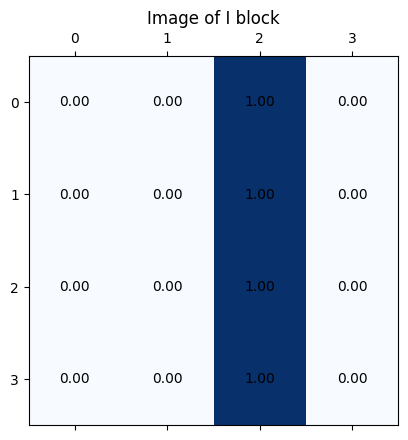

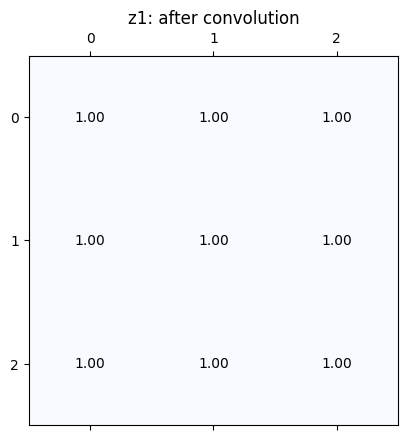

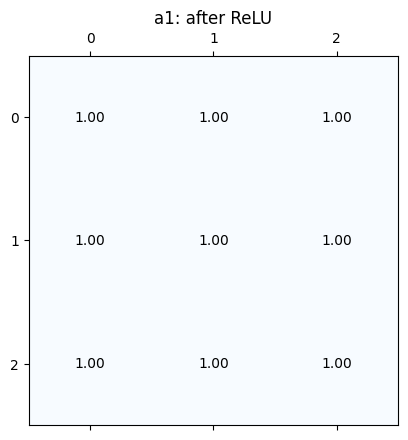

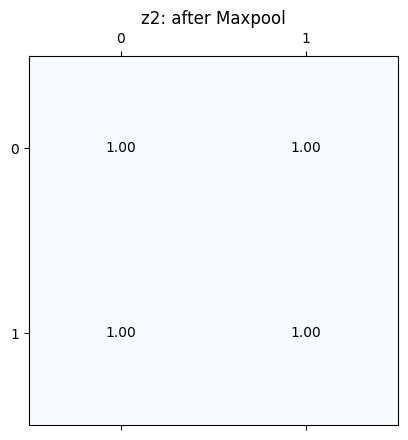

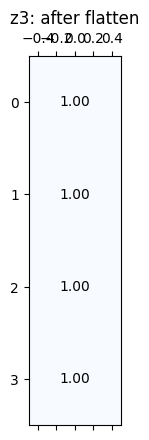

In [444]:


# Let "O" = 0 and "I" = 1,
I = Matrix2D(np.zeros((4, 4)))
I[:4, 2] = 1
y = 1
I.draw("Image of I block")

# LEARNED PARAMETERS
K = Matrix2D(np.array(([[1, -1], [-1, 1]])))
w = np.random.uniform(low=-1, high=1, size=(1, 4))

b1 = 1.0
b2 = 1.0

nn = Network(weights=w, bias = b2)

# FORWARD PASS:
z1 = I.convolve2D(K, bias=b1, stride=1)
z1.draw("z1: after convolution")

a1 = Matrix2D(nn.relu(z1.data))
a1.draw("a1: after ReLU")

z2: Matrix2D = z1.maxpool(ndim=2, stride=1)
z2.draw("z2: after Maxpool")

z3: Matrix2D = z2.flatten()
z3.draw("z3: after flatten")

z4: float = nn.forward(z3.data)[0, 0]
print(f"z4 = {z4} after FCNN")

a2 = nn.sigmoid(z4)
print(f"a2 = {a2} after Sigmoid")

l = nn.binary_cross_entropy(y, a2)
print(f"loss: {l}")


# BACKWARD PASS:





# Micrograd inspired FCNN

In [446]:
class Base():
    
    def reset(self):
        for p in self.p():
            p.grad = 0

    def p(self):
        return []

In [447]:

class Neuron(Base):
    
    def __init__(self, n_inputs, f=None):
        """Create a neuron with n inputs.
        
        Optionally specify an activation function.
        If no activation function is set, a default one
        will be set. Right now that is f(x) = x
        """
        self.w = [Float(np.random.uniform(-1, 1)) for _ in range(n_inputs)]
        self.b = Float(np.random.uniform())
        
        if f is None:
            self.f = lambda x : x # Linear
            #self.f = lambda x : max(x, 0) #ReLU
        else:
            self.f = f
    
    def z(self, x):
        """Calculate the pre-activation neuron output"""
        return x@self.w.T + self.b
    
    def a(self, x):
        """Calculate the post-activation neuron output"""
        return self.f(self.z(x))

    def p(self):
        """Return the weights of the neuron"""
        return [self.b] + self.w

    
# Test
#N = 3
#n = Neuron(N)
#x = np.random.rand(N)
#print(n.a(x))


In [448]:
class Layer(Base):
    
    def __init__(self, n_neurons, n_inputs):
        """Create a layer of n_neurons
        
        The amount of inputs to the neurons will also need to be specified.
        """
        self.neurons = [Neuron(n_inputs) for _ in range(n_neurons)]
        
    def out(self, x):
        """Return the vector of outputs of the layer"""
        return [n.out(x) for n in self.neurons]

    def p(self):
        """Return the parameters for all the neurons in the layer"""
        return [p for n in self.neurons for p in n.p()]
        
    
        
    

In [449]:
class FCNN(Base):
    
    def __init__(self, n_inputs, n_outputs):
        """Create a fully-connected network of n layers
        """
        sizes = [n_inputs] + n_outputs
        self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(n_outputs))]
        
        
    def out(self, x):
        for l in self.layers:
            x = l(x)
        return x

    def p(self):
        [p for l in self.layers for p in l.p()]
